<center>
<img src="img/colorido-horizontal-ufc.png" alt="Drawing" style="width: 500px;"/>
</center>

# Tópicos em Física Estatística Computacional

## Aula 02: Medindo Caos 

Prof. Saulo Reis (Depto. de Física - UFC)

## Expoente de Lyapunov

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
%matplotlib inline

In [2]:
def logistic_map(x, r):
    """
    Função do mapa logístico: f(x) = 4 * r * x * (1 - x).
    """
    return 4 * r * x * (1 - x)

def iterate_map(x0, r, iterations=50):
    """
    Itera o mapa logístico por um número de iterações especificado.
    """
    x = x0
    trajectory = [x]  # Armazena a trajetória
    for _ in range(iterations):
        x = logistic_map(x, r)
        trajectory.append(x)
    return trajectory

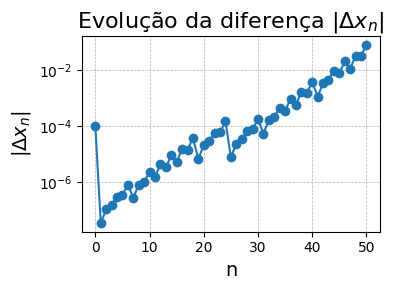

In [3]:
# Parâmetros para a simulação
r = 0.91
x0_1 = 0.5
x0_2 = 0.5001
iterations = 50

# Itera o mapa logístico para as duas condições iniciais
trajectory_1 = iterate_map(x0_1, r, iterations)
trajectory_2 = iterate_map(x0_2, r, iterations)

# Calcula a diferença absoluta entre as duas trajetórias
delta_x = [abs(trajectory_1[i] - trajectory_2[i]) for i in range(len(trajectory_1))]

# Gera a figura
plt.figure(figsize=(4, 3))
plt.plot(range(len(delta_x)), delta_x, marker='o', linestyle='-')
plt.yscale('log')  # Escala logarítmica no eixo y
plt.xlabel('n', fontsize=14)
plt.ylabel(r'$|\Delta x_n|$', fontsize=14)
plt.title('Evolução da diferença $|\Delta x_n|$', fontsize=16)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

In [4]:
def logistic_map_derivative(x, r):
    """
    Derivada do mapa logístico: f'(x) = 4 * r * (1 - 2 * x).
    """
    return 4 * r * (1 - 2 * x)

def lyapunov_exponent(r, x0=0.5, discard=1000, n_iter=10**5):
    """
    Calcula o expoente de Lyapunov para um dado valor de r.
    
    Parâmetros:
    - r: Parâmetro de controle do mapa logístico.
    - x0: Condição inicial de x.
    - discard: Número de iterações a serem descartadas no início.
    - n_iter: Número de iterações para o cálculo do expoente de Lyapunov.
    """
    x = x0
    lyapunov_sum = 0

    # Descartar as primeiras 'discard' iterações
    for _ in range(discard):
        x = logistic_map(x, r)
    
    # Calcular o expoente de Lyapunov
    for _ in range(n_iter):
        x = logistic_map(x, r)
        lyapunov_sum += np.log(abs(logistic_map_derivative(x, r)))
    
    return lyapunov_sum / n_iter

In [5]:
# Definindo os valores de r no intervalo [0.7, 1.0]
r_values = np.linspace(0.7, 1.0, 300)
lambda_values = []

# Calculando o expoente de Lyapunov para cada valor de r
for r in r_values:
    lambda_r = lyapunov_exponent(r)
    lambda_values.append(lambda_r)

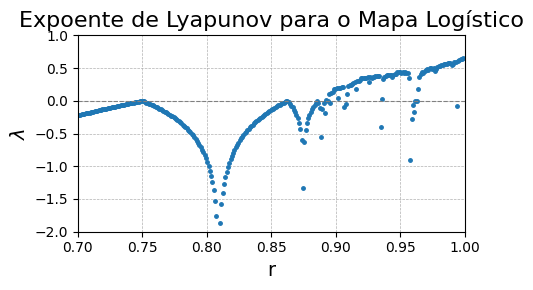

In [6]:
# Gerar a figura
plt.figure(figsize=(5, 3))
plt.plot(r_values, lambda_values, '.', markersize=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Linha em λ = 0
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$\lambda$', fontsize=14)
plt.title('Expoente de Lyapunov para o Mapa Logístico', fontsize=16)
plt.xlim(0.7, 1.0)
plt.ylim(-2.0, 1.0)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

### Entropia do Mapa Logístico

In [23]:
def compute_entropy(traj, delta_x=0.01):
    # Número de bins
    num_bins = int(1 / delta_x)
    
    # Histograma da trajetória
    hist, _ = np.histogram(traj, bins=num_bins, range=(0, 1), density=True)
    
    # Calcula a probabilidade de cada bin
    p = hist / np.sum(hist)
    
    # Calcula a entropia S, ignorando probabilidades zero
    p = p[p > 0]
    S = -np.sum(p * np.log(p))
    
    return S

def iterate_logistic_map(r, n):
    x0 = random.uniform(0, 1) # Condição inicial
    x = x0
    trajectory = []
    for _ in range(n):
        x = logistic_map(x, r)
        trajectory.append(x)
    return trajectory

def plot_entropy_vs_r(r_values, n, delta_x=0.01):
    entropy_values = []

    # Itera sobre os valores de r e calcula a entropia para cada um
    for r in r_values:
        trajectory = iterate_logistic_map(r, n)
        S = compute_entropy(trajectory, delta_x=delta_x)
        entropy_values.append(S)

    # Plota a entropia em função de r
    plt.figure(figsize=(5, 3))
    plt.plot(r_values, entropy_values, '-o', markersize=4)
    plt.xlabel('r', fontsize=14)
    plt.ylabel('Entropia S', fontsize=14)
    plt.title('Entropia S vs. r para o Mapa Logístico', fontsize=16)
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.tight_layout()
    plt.show()


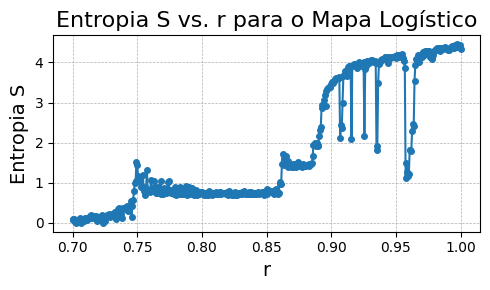

In [24]:
# Parâmetros
n = 1000  # Número de iterações
delta_x = 0.01  # Largura dos bins
r_values = np.linspace(0.7, 1.0, 481)  # Intervalo de valores de r

# Plota entropia em função de r
plot_entropy_vs_r(r_values, n, delta_x)

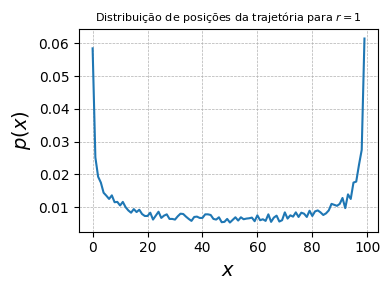

In [95]:
# Parâmetros
n = 10000  # Número de iterações
delta_x = 0.01  # Largura dos bins

#Selecciona uma trajetória para r = 1
trajectory = iterate_logistic_map(1, n)
# Número de bins
num_bins = int(1 / delta_x)
    
# Histograma da trajetória
hist, _ = np.histogram(trajectory, bins=num_bins, range=(0, 1), density=True)
    
# Calcula a probabilidade de cada bin
p = hist / np.sum(hist)

# Gera a figura
plt.figure(figsize=(4, 3))
plt.plot(p)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$p(x)$', fontsize=14)
plt.title('Distribuição de posições da trajetória para $r=1$', fontsize=8)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

## Modelos em dimenções superiores

In [13]:
def iterate_map(x0, y0, a, b, n_iterations, transient=1000, x_range=None, y_range=None):
    x, y = x0, y0
    x_values, y_values = [], []

    # Iterar o mapa por n_iterations
    for _ in range(n_iterations):
        # Armazena os valores após o transiente e dentro da região especificada
        if _ >= transient:
            if x_range and y_range:
                if x_range[0] <= x <= x_range[1] and y_range[0] <= y <= y_range[1]:
                    x_values.append(x)
                    y_values.append(y)
            else:
                x_values.append(x)
                y_values.append(y)

        # Calcula os novos valores
        x_new = y + 1 - a * x**2
        y_new = b * x

        # Atualiza x e y
        x, y = x_new, y_new

    return x_values, y_values

In [14]:
# Parâmetros do problema
a = 1.4
b = 0.3
n_iterations = 10000
transient = 1000
x_range = (-1.5, 1.5)
y_range = (-0.45, 0.45)

# Condições iniciais 1
x0_1, y0_1 = 0, 0
x_values_1, y_values_1 = iterate_map(
    x0_1, y0_1, a, b, n_iterations, transient,
    x_range, y_range
    )

# Condições iniciais 2
x0_2, y0_2 = 0.63135448, 0.18940634
x_values_2, y_values_2 = iterate_map(
    x0_2, y0_2, a, b, n_iterations, transient,
    x_range, y_range
    )

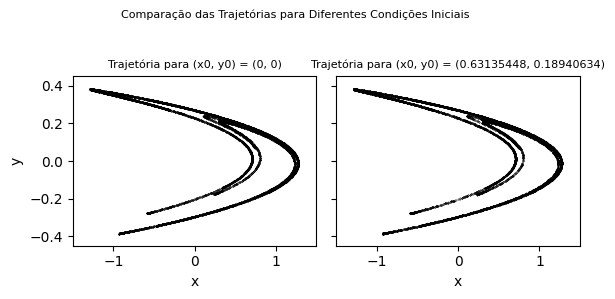

In [18]:
# Plot das trajetórias
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)

# Trajetória a partir de (x0, y0) = (0, 0)
ax[0].plot(x_values_1, y_values_1, 'k.', markersize=0.5)
ax[0].set_title('Trajetória para (x0, y0) = (0, 0)', fontsize=8)
ax[0].set_xlim(-1.5, 1.5)
ax[0].set_ylim(-0.45, 0.45)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Trajetória a partir de (x0, y0) = (0.63135448, 0.18940634)
ax[1].plot(x_values_2, y_values_2, 'k.', markersize=0.5)
ax[1].set_title('Trajetória para (x0, y0) = (0.63135448, 0.18940634)', fontsize=8)
ax[1].set_xlim(-1.5, 1.5)
ax[1].set_ylim(-0.45, 0.45)
ax[1].set_xlabel('x')

plt.suptitle('Comparação das Trajetórias para Diferentes Condições Iniciais', fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

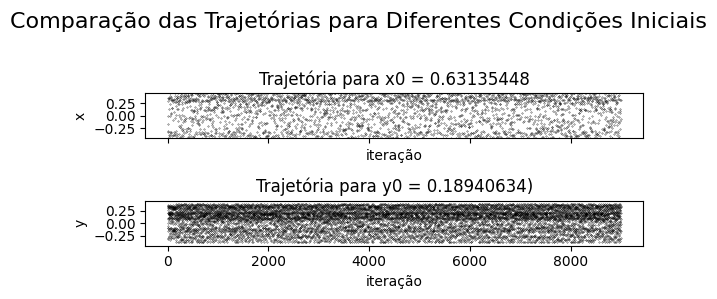

In [26]:
# Plot das trajetórias
fig, ax = plt.subplots(2, 1, figsize=(6, 3), sharex=True, sharey=True)

# Trajetória a partir de (x0, y0) = (0, 0)
ax[0].plot(x_values_2, 'k.', markersize=0.5)
ax[0].set_title('Trajetória para x0 = 0.63135448')
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('iteração')
ax[0].set_ylabel('x')

# Trajetória a partir de (x0, y0) = (0.63135448, 0.18940634)
ax[1].plot(y_values_2, 'k.', markersize=0.5)
ax[1].set_title('Trajetória para y0 = 0.18940634)')
ax[1].set_ylim(-0.45, 0.45)
ax[1].set_xlabel('iteração')
ax[1].set_ylabel('y')

plt.suptitle('Comparação das Trajetórias para Diferentes Condições Iniciais', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [27]:
# Parâmetros para a simulação
a = 1.4
b = 0.3
transient = 1000
x0, y0 = 0.63135448, 0.18940634

# Define as diferentes regiões para o plot
regions = [
    {'x_range': (0.5, 0.75), 'y_range': (0.15, 0.21), 'n_iterations': 100000, 'title': 'Região 1'},
    {'x_range': (0.62, 0.64), 'y_range': (0.185, 0.191), 'n_iterations': 1000000, 'title': 'Região 2'},
    {'x_range': (0.6305, 0.6325), 'y_range': (0.1889, 0.1895), 'n_iterations': 10000000, 'title': 'Região 3'}
]

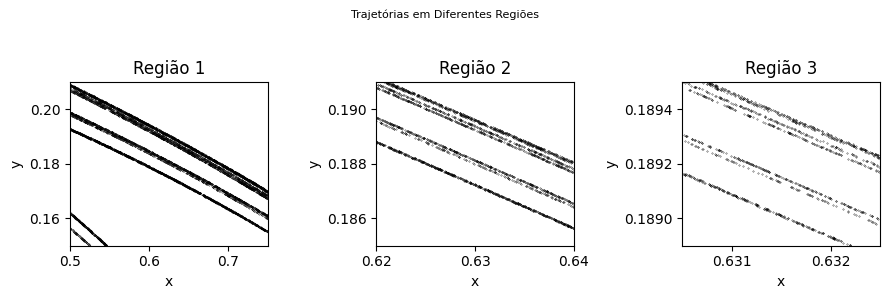

In [28]:
# Gera o plot para cada região especificada
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for i, region in enumerate(regions):
    x_values, y_values = iterate_map(
        x0, y0, a, b, region['n_iterations'], transient,
        x_range=region['x_range'], y_range=region['y_range']
    )

    # Plota a trajetória na região especificada
    axes[i].plot(x_values, y_values, 'k.', markersize=0.5)
    axes[i].set_xlim(region['x_range'])
    axes[i].set_ylim(region['y_range'])
    axes[i].set_title(region['title'])
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.suptitle('Trajetórias em Diferentes Regiões', fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Problema 15. Caoticidade do Mapa de Henón

**a.** Determine se o sistema é caótico, isto é, se é sensível às condições iniciais. Inicie dois pontos muito próximos um do outro e observe suas trajetórias por um tempo fixo. Use cores diferentes para as duas trajetórias.

**b.** É relativamente simples, em princípio, estender o método de cálculo do expoente de Lyapunov que utilizamos para um mapa unidimensional a mapas de dimensões superiores. A ideia é linearizar as equações de diferença (ou diferenciais) e substituir $dx_n$ pela quantidade vetorial correspondente $d\mathbf{r}_n$. Essa generalização fornece o expoente de Lyapunov correspondente à divergência ao longo da direção de crescimento mais rápido.

In [65]:
# Parâmetros do problema
a = 1.4
b = 0.3
n_iterations = 50
transient = 0
x_range = (-1.5, 1.5)
y_range = (-0.45, 0.45)

# Condições iniciais 1
x0_1, y0_1 = 0, 0
x_values_1, y_values_1 = iterate_map(
    x0_1, y0_1, a, b, n_iterations, transient,
    x_range, y_range
    )

# Condições iniciais 2
x0_2, y0_2 = 0.000001, 0
x_values_2, y_values_2 = iterate_map(
    x0_2, y0_2, a, b, n_iterations, transient,
    x_range, y_range
    )

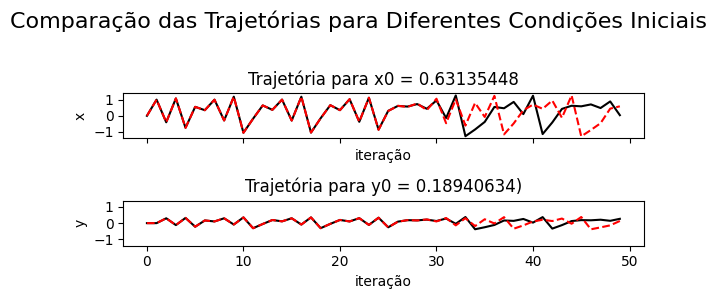

In [66]:
# Plot das trajetórias
fig, ax = plt.subplots(2, 1, figsize=(6, 3), sharex=True, sharey=True)

# Trajetória a partir de (x0, y0) = (0, 0)
ax[0].plot(x_values_1, 'k-')
ax[0].plot(x_values_2, 'r--')
ax[0].set_title('Trajetória para x0 = 0.63135448')
ax[0].set_xlabel('iteração')
ax[0].set_ylabel('x')

# Trajetória a partir de (x0, y0) = (0.000001, 0)
ax[1].plot(y_values_1, 'k-')
ax[1].plot(y_values_2, 'r--')
ax[1].set_title('Trajetória para y0 = 0.18940634)')
ax[1].set_xlabel('iteração')
ax[1].set_ylabel('y')

plt.suptitle('Comparação das Trajetórias para Diferentes Condições Iniciais', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

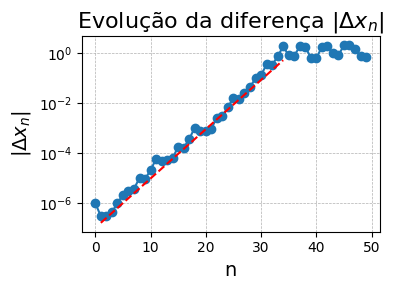

In [93]:
# Calcula a diferença absoluta entre as duas trajetórias
delta_x = [abs(x_values_1[i] - x_values_2[i])+abs(y_values_1[i] - y_values_2[i]) for i in range(len(x_values_1))]

slope, intercept, _, _, _ = stats.linregress(range(1,35), np.log(delta_x[1:35]))
reg = np.exp(intercept) * np.exp(slope * range(len(delta_x[1:35])))

# Gera a figura
plt.figure(figsize=(4, 3))
plt.plot(range(len(delta_x)), delta_x, marker='o', linestyle='-')
plt.plot(range(1,35),reg, 'r--')
plt.yscale('log')  # Escala logarítmica no eixo y
plt.xlabel('n', fontsize=14)
plt.ylabel(r'$|\Delta x_n|$', fontsize=14)
plt.title('Evolução da diferença $|\Delta x_n|$', fontsize=16)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()